In [330]:
'''
Curso : Analisis de Datos con Python
Sesion : 3
Tema  : Desarrollo de modelos
Fecha : 10/01/2026
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [331]:
file_path = 'dataset/autos_sin_nan.csv'
df = pd.read_csv(file_path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [332]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [333]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [334]:
df.dropna(axis=0, inplace=True)

In [335]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

## 1.- Regresión Simple

#### Ecuación de regresión simple 

- $ y = b_0  + b_1x + error $

- $ \hat{y} = b_0  + b_1x$

##### Error

- $ error = y - \hat{y} $

##### Concluimos
- $ y = \hat{y} + error $

### Seleccionando variables, hallando matriz de correlación y graficando histogramas

In [336]:
v_num = df.select_dtypes(["float64", "int64"])
v_num = list(v_num.columns)
v_num

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'city-L/100km',
 'diesel',
 'gas']

In [337]:
df[v_num].corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.453423,-0.533112,-0.359883,-0.242821,-0.539407,-0.226121,-0.055329,-0.142125,-0.013520,-0.180275,0.090778,0.229436,0.004688,0.073359,-0.076420,0.021612,-0.192544,0.192544
normalized-losses,0.453423,1.000000,-0.046971,0.027234,0.090056,-0.362499,0.107034,0.147862,-0.030152,0.056054,-0.112288,0.226654,0.215903,-0.208695,-0.166772,0.138183,0.223308,-0.096487,0.096487
wheel-base,-0.533112,-0.046971,1.000000,0.876945,0.821427,0.607417,0.790205,0.592517,0.493941,0.163725,0.248383,0.381984,-0.351925,-0.496565,-0.566948,0.591956,0.517050,0.305889,-0.305889
length,-0.359883,0.027234,0.876945,1.000000,0.857249,0.522367,0.882091,0.698626,0.608496,0.136850,0.156926,0.583073,-0.280397,-0.686142,-0.715124,0.689466,0.690579,0.212484,-0.212484
width,-0.242821,0.090056,0.821427,0.857249,1.000000,0.351127,0.862835,0.739543,0.543859,0.210495,0.188331,0.604099,-0.252116,-0.639692,-0.684550,0.744176,0.685663,0.251112,-0.251112
height,-0.539407,-0.362499,0.607417,0.522367,0.351127,1.000000,0.354085,0.100518,0.199490,-0.084755,0.269773,-0.031489,-0.270020,-0.128523,-0.181670,0.182407,0.111120,0.279063,-0.279063
curb-weight,-0.226121,0.107034,0.790205,0.882091,0.862835,0.354085,1.000000,0.858968,0.646918,0.193575,0.153952,0.750749,-0.281231,-0.766146,-0.808146,0.828483,0.809512,0.228445,-0.228445
engine-size,-0.055329,0.147862,0.592517,0.698626,0.739543,0.100518,0.858968,1.000000,0.601384,0.265626,0.017246,0.825377,-0.227577,-0.712693,-0.734062,0.889265,0.814696,0.076032,-0.076032
bore,-0.142125,-0.030152,0.493941,0.608496,0.543859,0.199490,0.646918,0.601384,1.000000,-0.049606,-0.000044,0.579114,-0.276668,-0.591597,-0.598455,0.544375,0.574286,0.055927,-0.055927
stroke,-0.013520,0.056054,0.163725,0.136850,0.210495,-0.084755,0.193575,0.265626,-0.049606,1.000000,0.191776,0.139409,-0.067852,-0.050971,-0.052345,0.107893,0.065893,0.240193,-0.240193


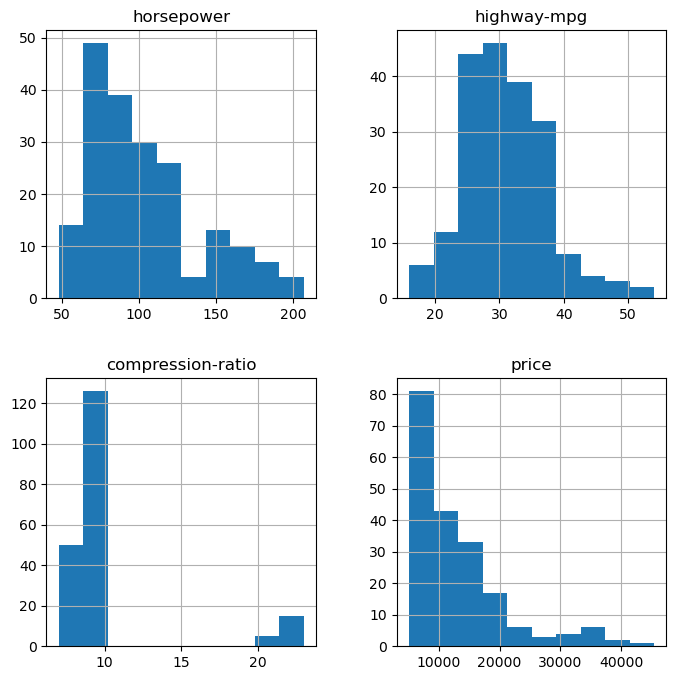

In [338]:
df[['horsepower',
    'highway-mpg',
    'compression-ratio',
    'price']].hist(layout=(2,2),
                     sharex=False,sharey=False,figsize=(8,8))
plt.show()

Aplicando regresión simple, mostrando los coeficientes y escribiendo la ecuación


In [339]:
# Regresion Lineal usando sklearn
from sklearn.linear_model import LinearRegression

# lm es el modelo de regresion lineal
lm = LinearRegression()

x = df[['horsepower']]
y = df['price']


In [340]:
# ajustar el modelo ( calcular b0 y b1 )
lm.fit(x,y)

# coeficiente
b0 = lm.intercept_
b1 = lm.coef_
print("b0:", b0)
print("b1:", b1)

b0: -4879.505989269364
b1: [175.40561198]


$$ \hat{y} = -4879.51 + 175.406x $$

Graficando la ecuación y los residuales

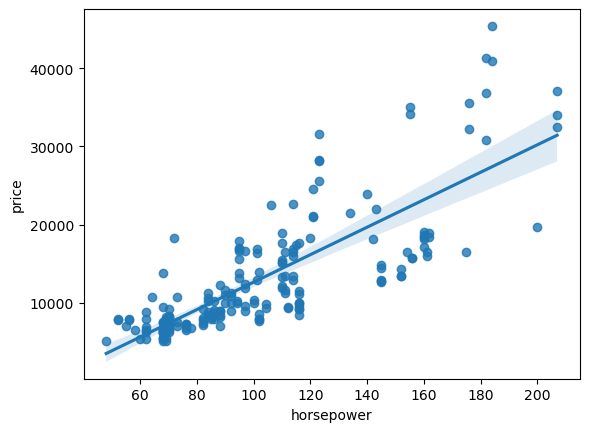

In [341]:
sns.regplot(x='horsepower', y='price', data=df , fit_reg=True)
plt.show()

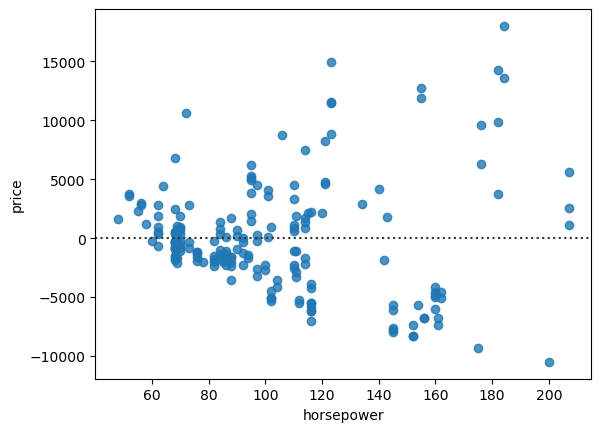

In [342]:
sns.residplot(x='horsepower', y='price', data=df)
plt.show()

### Tarea 
Encontrar el modelo de regresióm simple para las siguiente variables:
- highway-mpg
- compression-ratio


## 2.- Regresión múltiple

#### Ecuación de regresión múltiple

$ y = b_0 + b_1x_1 + b_2x_2 +...+ b_nx_n + error $

$ \hat{y} = b_0 + b_1x_1 + b_2x_2 +...+ b_nx_n $

#### Error
$ y - \hat{y} = error $

#### Concluimos
$ y = \hat{y} + error $


In [343]:
# Seleccionando variables predictoras
# Las variables predictoras se seleccionan en base a la correlacion 
# con la variable 'price'

cdf = df[['horsepower', 'highway-mpg', 'compression-ratio', 'price']]
cdf.head()

,horsepower,highway-mpg,compression-ratio,price
0,111.0,27,9.0,13495.0
1,111.0,27,9.0,16500.0
2,154.0,26,9.0,16500.0
3,102.0,30,10.0,13950.0
4,115.0,22,8.0,17450.0


In [344]:
# Regresion Lineal usando sklearn
from sklearn.linear_model import LinearRegression

# lm es el modelo de regresion lineal
lm = LinearRegression()

X = cdf[['horsepower', 'highway-mpg', 'compression-ratio']]
Y = cdf[['price']]


In [345]:
# Ajustar el modelo ( calcular b0 y b )
lm.fit(X,Y)

# coeficiente
b0 = lm.intercept_
b = lm.coef_
print("b0:", b0)
print("b:", b)

b0: [569.51095815]
b: [[ 148.56282521 -272.35437022  562.36563598]]


$$  \hat{y} =  569.11 +  148.56x_1 -272.35x_2  +562.37x_3 $$

### Graficando los residuales

- $ error = y - \hat{y} $

In [346]:

# Calculo Yhat
Yhat = lm.predict(X)

# Calculo error
error = Y.values - Yhat


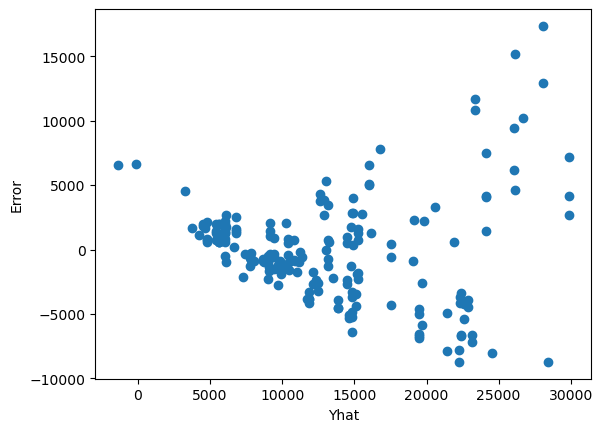

In [347]:
plt.scatter(Yhat, error)
plt.xlabel("Yhat")
plt.ylabel("Error")
plt.show()

In [348]:

## Ejercicio : Realizar un modelo de regresion múltiple con las variables siguientes
# 'curb-weight', 'engine-size', 'highway-mpg' y 'price'




## 3.- Regresión Polinómica

- Cuadrática (segundo orden)
$$ \hat{y} = b_0 + b_1x + b_2x^2 $$

- Cúbica (tercer orden)
$$ \hat{y} = b_0 + b_1x + b_2x^2 + b_3x^3 $$

- Superior (n-ésimo orden)
$$ \hat{y} = b_0 + b_1x + b_2x^2 + b_3x^3 +...+ b_nx^n $$

In [349]:
# Regresion polinomica de grado 2

X = df['highway-mpg']
Y = df['price']
grade = 2

# Ajuste polinomico
f = np.polyfit(X, Y, grade)

print(f)

[ 4.64524077e+01 -3.87087113e+03  8.62658335e+04]


In [350]:
p = np.poly1d(f)
print(p)

       2
46.45 x - 3871 x + 8.627e+04


$$ \hat{y} = 86265.83 -3870.87x + 4645x^2 $$

In [351]:
def plot_poly(model, independent_variable, dependent_variable, name, title):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title(title)
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('price')
    plt.show()

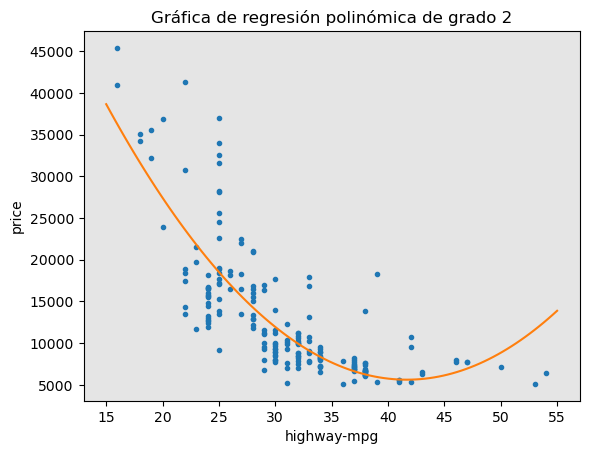

In [352]:
plot_poly(p, X, Y, 'highway-mpg','Gráfica de regresión polinómica de grado 2')

In [353]:
# Regresion polinomica de grado 3

X = df['highway-mpg']
Y = df['price']
grade = 3

# Ajuste polinomico
f = np.polyfit(X, Y, grade)

print(f)

[-1.54103878e+00  2.05042094e+02 -9.06737826e+03  1.40428290e+05]


In [354]:
p = np.poly1d(f)
print(p)

        3       2
-1.541 x + 205 x - 9067 x + 1.404e+05


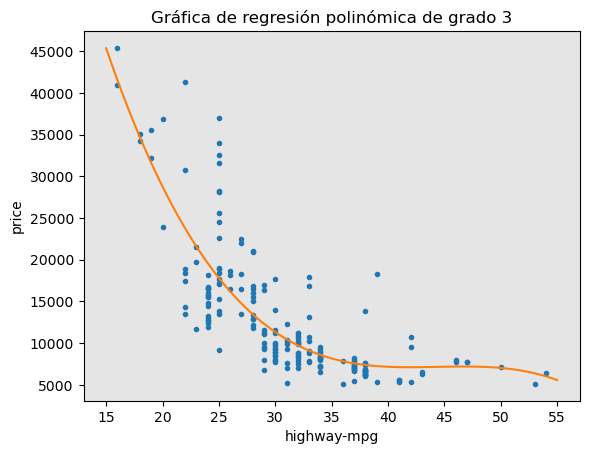

In [355]:
plot_poly(p, X, Y, 'highway-mpg','Gráfica de regresión polinómica de grado 3')

In [356]:
# Regresion polinomica de grado 11

X = df['highway-mpg']
Y = df['price']
grade = 11

# Ajuste polinomico
f = np.polyfit(X, Y, grade)

print(f)

[-8.48392425e-09  3.19968901e-06 -5.39396252e-04  5.36002820e-02
 -3.48515235e+00  1.55534840e+02 -4.85645554e+03  1.05989427e+05
 -1.58295767e+06  1.53950418e+07 -8.76917754e+07  2.21598321e+08]


In [357]:
p = np.poly1d(f)
print(p)

            11           10             9          8         7
-8.484e-09 x  + 3.2e-06 x  - 0.0005394 x + 0.0536 x - 3.485 x
          6        5            4             3            2
 + 155.5 x - 4856 x + 1.06e+05 x - 1.583e+06 x + 1.54e+07 x - 8.769e+07 x + 2.216e+08


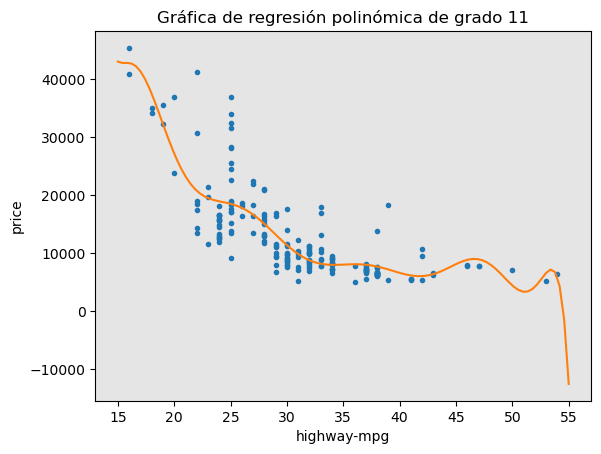

In [358]:
plot_poly(p, X, Y, 'highway-mpg','Gráfica de regresión polinómica de grado 11')

- Sobre ajuste de un modelo --> overfitting
- Ajuste muy simple del modelo --> underfitting

<img src="images/underfitting_overfitting.png" />

### 3.- Medida de evaluación del modelo : $MSE$ y $R^2$ 

In [359]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [360]:
lm = LinearRegression()
X = df[['horsepower']]
Y = df['price']
lm.fit(X, Y)

Y_pred = lm.predict(X)
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 22015551.68353453
R2 Score: 0.6432686120142905


In [361]:
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)

Y_pred = lm.predict(X)
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 30825942.551791985
R2 Score: 0.5005084846139531


In [362]:
lm = LinearRegression()
X = df[['compression-ratio']]
Y = df['price']
lm.fit(X, Y)

Y_pred = lm.predict(X)
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 61431300.65212057
R2 Score: 0.004591233396696537


In [363]:
# lm es el modelo de regresion lineal
lm = LinearRegression()
X = df[['horsepower', 'highway-mpg', 'compression-ratio']]
Y = df['price']
lm.fit(X, Y)

Y_pred = lm.predict(X)
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 16706031.206913946
R2 Score: 0.7293020049716874


In [364]:
# lm es el modelo de regresion lineal
lm = LinearRegression()
X = df[['horsepower', 'highway-mpg']]
Y = df['price']
lm.fit(X, Y)

Y_pred = lm.predict(X)
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 21485978.524322245
R2 Score: 0.6518496083409493


## Predicciones

In [365]:
import statsmodels.formula.api as smf

In [366]:
def graph(y_real, y_pred):
    
    plt.figure(figsize=(10, 6))
    sns.kdeplot(y_real, color="r", label="Valor real", fill=False, alpha=0.3, linewidth=2)
    sns.kdeplot(y_pred, color="b", label="Valor predicho", fill=False, alpha=0.3, linewidth=2)

    plt.title('Distribución: Valor real vs. valor predicho para price')
    plt.xlabel('price')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [367]:
df1 = df[['horsepower','price']].copy() # Crear una copia para evitar SettingWithCopyWarning
df1.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


In [368]:
results = smf.ols('price ~  horsepower', data=df1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     349.8
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           2.69e-45
Time:                        19:35:15   Log-Likelihood:                -1935.0
No. Observations:                 196   AIC:                             3874.
Df Residuals:                     194   BIC:                             3881.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4879.5060   1018.331     -4.792      0.0

In [369]:
x = df1['horsepower']
#
y_pred = results.predict(x)

df1["price_hat"] = y_pred
df1["error"] = df1["price"] - df1["price_hat"] 

df1.head()

,horsepower,price,price_hat,error
0,111.0,13495.0,14590.516940,-1095.516940
1,111.0,16500.0,14590.516940,1909.483060
2,154.0,16500.0,22132.958255,-5632.958255
3,102.0,13950.0,13011.866432,938.133568
4,115.0,17450.0,15292.139388,2157.860612


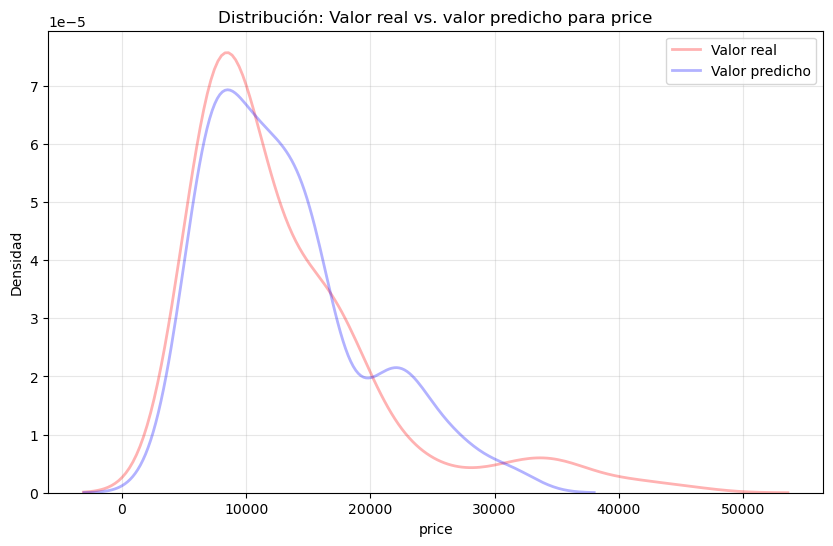

In [370]:
y_real = df1['price']  # Valores reales
graph(y_real, y_pred)

In [371]:
df2 = df[['highway-mpg','price']].copy()
df2 = df2.rename(columns={'highway-mpg': 'highway_mpg'})
df2.head()

,highway_mpg,price
0,27,13495.0
1,27,16500.0
2,26,16500.0
3,30,13950.0
4,22,17450.0


In [372]:
# Regresión usando la librería statsmodels
results = smf.ols('price ~  highway_mpg', data=df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     194.4
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           4.60e-31
Time:                        19:35:15   Log-Likelihood:                -1968.0
No. Observations:                 196   AIC:                             3940.
Df Residuals:                     194   BIC:                             3947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.865e+04   1876.093     20.604      

In [373]:
y_pred = results.predict(df2['highway_mpg'])
df2["price_hat"] = y_pred
df2["error"] = df2["price"] - df2["price_hat"] 
df2.head()

,highway_mpg,price,price_hat,error
0,27,13495.0,16330.296748,-2835.296748
1,27,16500.0,16330.296748,169.703252
2,26,16500.0,17157.135291,-657.135291
3,30,13950.0,13849.781118,100.218882
4,22,17450.0,20464.489463,-3014.489463


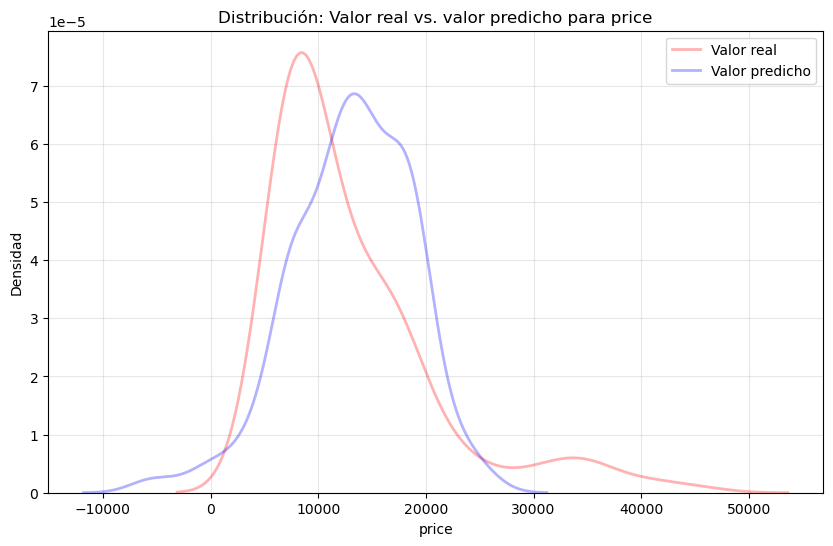

In [374]:
y_real = df2['price']  # Valores reales
graph(y_real, y_pred)

In [375]:
df3 = df[['compression-ratio','price']].copy()
df3 = df3.rename(columns={'compression-ratio': 'compression_ratio'})
df3.head()

,compression_ratio,price
0,9.0,13495.0
1,9.0,16500.0
2,9.0,16500.0
3,10.0,13950.0
4,8.0,17450.0


In [376]:
# Regresión usando la librería statsmodels
results = smf.ols('price ~  compression_ratio', data=df3).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8948
Date:                Sat, 10 Jan 2026   Prob (F-statistic):              0.345
Time:                        19:35:15   Log-Likelihood:                -2035.6
No. Observations:                 196   AIC:                             4075.
Df Residuals:                     194   BIC:                             4082.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.176e+04   1523.64

In [377]:
y_pred = results.predict(df3['compression_ratio'])
df3["price_hat"] = y_pred
df3["error"] = df3["price"] - df3["price_hat"] 
df3.head()

,compression_ratio,price,price_hat,error
0,9.0,13495.0,12940.213154,554.786846
1,9.0,16500.0,12940.213154,3559.786846
2,9.0,16500.0,12940.213154,3559.786846
3,10.0,13950.0,13071.872957,878.127043
4,8.0,17450.0,12808.553351,4641.446649


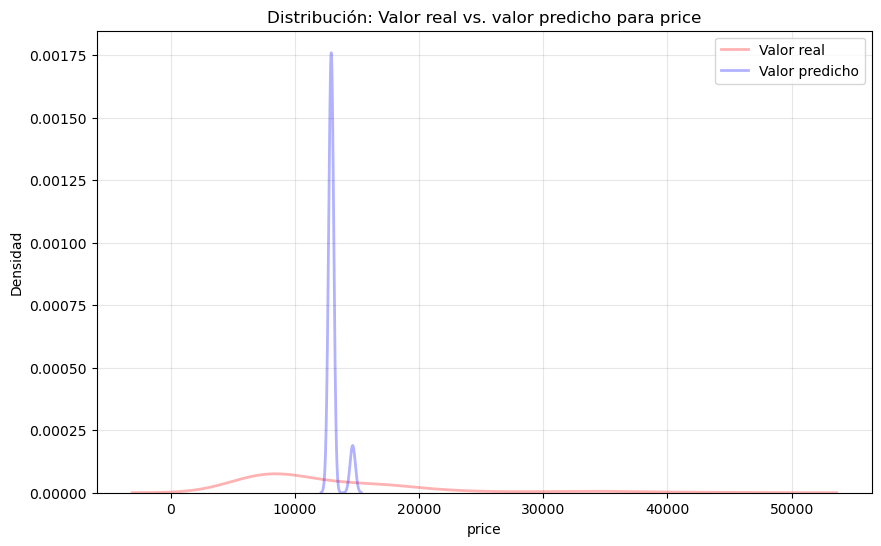

In [378]:
y_real = df3['price']  # Valores reales
graph(y_real, y_pred)

In [379]:
df4 = df[['horsepower','highway-mpg','compression-ratio','price']].copy()
df4 = df4.rename(columns={'highway-mpg': 'highway_mpg',
                          'compression-ratio': 'compression_ratio'})
df4.head()

,horsepower,highway_mpg,compression_ratio,price
0,111.0,27,9.0,13495.0
1,111.0,27,9.0,16500.0
2,154.0,26,9.0,16500.0
3,102.0,30,10.0,13950.0
4,115.0,22,8.0,17450.0


In [380]:
# Regresión usando la librería statsmodels
results = smf.ols('price ~  horsepower + highway_mpg + compression_ratio', data=df4).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     172.4
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           3.13e-54
Time:                        19:35:16   Log-Likelihood:                -1908.0
No. Observations:                 196   AIC:                             3824.
Df Residuals:                     192   BIC:                             3837.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           569.5110   3663.87

In [381]:
y_pred = results.predict(df4[['horsepower','highway_mpg','compression_ratio']])
df4["price_hat"] = y_pred
df4["error"] = df4["price"] - df4["price_hat"] 
df4.head()

,horsepower,highway_mpg,compression_ratio,price,price_hat,error
0,111.0,27,9.0,13495.0,14767.707284,-1272.707284
1,111.0,27,9.0,16500.0,14767.707284,1732.292716
2,154.0,26,9.0,16500.0,21428.263138,-4928.263138
3,102.0,30,10.0,13950.0,13175.944383,774.055617
4,115.0,22,8.0,17450.0,16161.364800,1288.635200


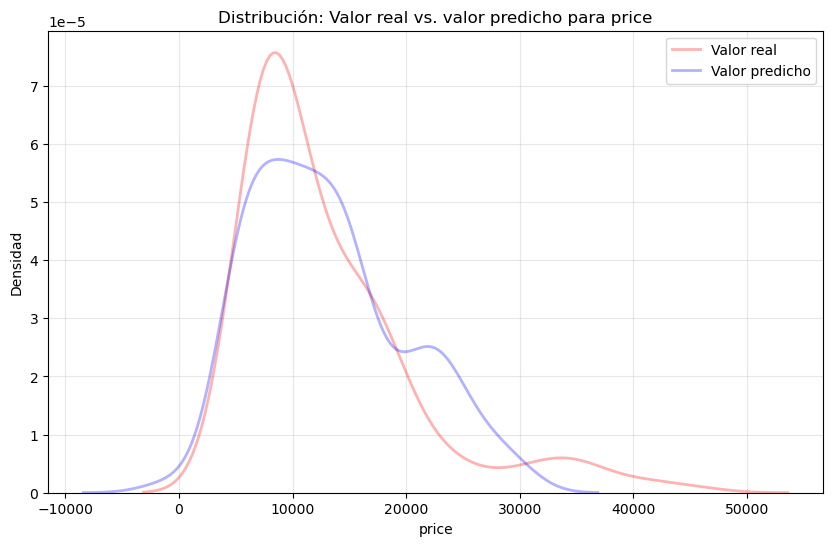

In [382]:
y_real = df4['price']  # Valores reales
graph(y_real, y_pred)

In [383]:
df5 = df[['horsepower','highway-mpg','price']].copy()
df5 = df5.rename(columns={'highway-mpg': 'highway_mpg'})
df5.head()

,horsepower,highway_mpg,price
0,111.0,27,13495.0
1,111.0,27,16500.0
2,154.0,26,16500.0
3,102.0,30,13950.0
4,115.0,22,17450.0


In [384]:
# Regresión usando la librería statsmodels
results = smf.ols('price ~  horsepower + highway_mpg', data=df5).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     180.7
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           6.03e-45
Time:                        19:35:16   Log-Likelihood:                -1932.6
No. Observations:                 196   AIC:                             3871.
Df Residuals:                     193   BIC:                             3881.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3820.6324   4114.520      0.929      

In [385]:
y_pred = results.predict(df5[['horsepower','highway_mpg']])
df5["price_hat"] = y_pred
df5["error"] = df5["price"] - df5["price_hat"] 
df5.head()

,horsepower,highway_mpg,price,price_hat,error
0,111.0,27,13495.0,15078.825872,-1583.825872
1,111.0,27,16500.0,15078.825872,1421.174128
2,154.0,26,16500.0,21582.117391,-5082.117391
3,102.0,30,13950.0,13196.032866,753.967134
4,115.0,22,17450.0,16600.998406,849.001594


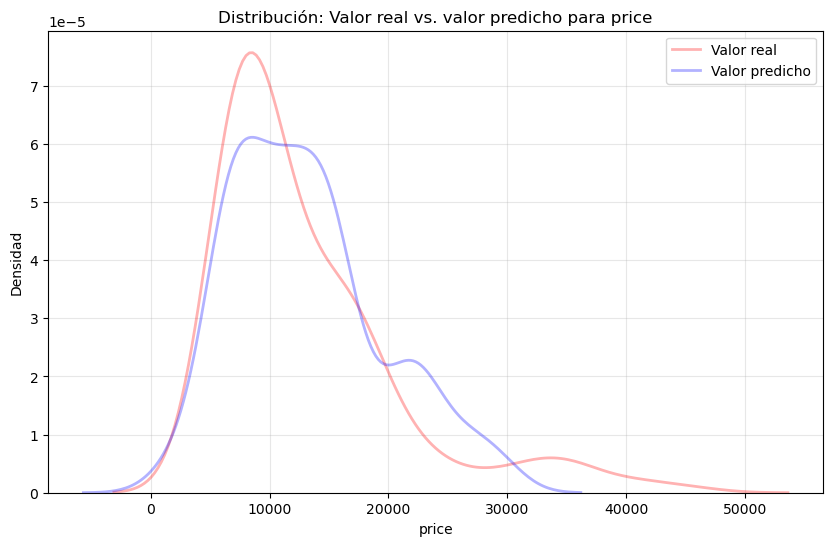

In [386]:
y_real = df5['price']  # Valores reales
graph(y_real, y_pred)